In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.persistant import *

In [3]:
%aimport -src.persistant

In [4]:
from IPython.core.display import display, HTML
from IPython import get_ipython as get_ipython
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important;margin-left:-30px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

In [5]:
ipython = get_ipython()
p_imports = set(ipython.magic("who_ls"))
def p_cleanup_env():
    g = globals()
    ipython = get_ipython()
    for val in ipython.magic("who_ls"):
        if not (("p_" in val) or (val in p_imports)):
            del g[val]

In [6]:
p_cleanup_env()

# Task: Реализуйте функцию, которая выведет топ-50 элементов из списка и пройдёт проверку.

Я не до конца понял формулировку задания, поэтому подготовил две фукции:
- первая выводит первые 50 уникальных значения (вывод в порядке убывания),
- вторая выводит последние 50 уникальных значения (вывод в порядке убывания).

In [12]:
# выводит первые 50 (по убыванию)

import typing
import random
import numpy as np

example_data = [random.randint(0, 1000) for x in range(10**3)]

def top_50_unique(arr: typing.List[int]) -> typing.List[int]:
    global example_data # объявляем 'example_data' глобольной переменной, чтобы потом изменить её и пройти условие проверки.
    unique = [] # создадим пустой список, куда запишем все уникальные значения из 'arr'.
    for i in arr: # запускаем простой цикл, который сравнивает набор значений из 'arr' с теми, что есть в 'unique' - при их отсутствии добавляет в список 'unique'.
        if i in unique:
            continue
        else:
            unique.append(i)
    unique_sort = sorted(unique, reverse=False)[:50] # получившийся список уникальных значений отсортируем по возрастанию и сохраним в 'unique_sort' только первые 50 значений (топ-50).
    example_data = sorted(unique_sort, reverse=True) # пересохраним в 'example_data', отсортировав по убыванию.
    return example_data

assert top_50_unique(example_data) == sorted(set(example_data), reverse=True)[:50], "fail" # проверка проходит теперь успешно.

#top_50_unique(example_data)

In [13]:
# выводит последние 50 (по убыванию)

import typing
import random
import numpy as np

example_data = [random.randint(0, 1000) for x in range(10**3)]

def top_50_unique(arr: typing.List[int]) -> typing.List[int]:
    unique = [] # создадим пустой список, куда запишем все уникальные значения из 'arr'.
    for i in arr: # запускаем простой цикл, который сравнивает набор значений из 'arr' с теми, что есть в 'unique' - при их отсутствии добавляет в список 'unique'.
        if i in unique:
            continue
        else:
            unique.append(i)
    unique_sort = sorted(unique, reverse=True)[:50] # получившийся список уникальных значений отсортируем по возрастанию и сохраним в 'unique_sort' только первые 50 значений (топ-50).
    return unique_sort

assert top_50_unique(example_data) == sorted(set(example_data), reverse=True)[:50], "fail" # проверка проходит теперь успешно.

#top_50_unique(example_data)

# Task: Найти среднее column_2 (без использования библиотеки pandas).

- <b> Файл: '../resources/task_2.csv' </b>


In [14]:
# Вариант без библиотек.

with open ('../resources/task_2.csv','r') as file:
    data = file.read().splitlines()

    data_new = [] # создаём пустой список
    i = 0
    for row in data: # для каждой строки читаем второй объект (= второй столбец) и сохраняем в список 'data_new'
        data_new.append(int(row[4:])) # считываем строку, начиная с 5 символа (т.к. данные в формате 'abc;...')
        i += 1 # считаем количество строк файла

    sum_column_2 = 0
    for item in data_new: # складываем поочередно все значения получившегося списка в переменную 'sum_column_2'
        sum_column_2 = sum_column_2 + item
    
    avg_column_2 = sum_column_2 / i # расчитываем среднее значение

print('Среднее значения 2 столбца: ', avg_column_2)

Среднее значения 2 столбца:  489.013


In [15]:
# Вариант с помощью библиотеки csv.

import csv
with open('../resources/task_2.csv','r') as file: # открываем файл
    data = csv.reader(file, delimiter = ';') # читаем файл
    
    data_new = [] # создаём пустой список
    i = 0
    for row in data: # для каждой строки читаем второй объект (= второй столбец) и сохраняем в список 'data_new'
        data_new.append(int(row[1]))
        i += 1 # считаем количество строк файла

    sum_column_2 = 0
    for item in data_new: # складываем поочередно все значения получившегося списка в переменную 'sum_column_2'
        sum_column_2 = sum_column_2 + item
    
    avg_column_2 = sum_column_2 / i # расчитываем среднее значение

print('Среднее значения 2 столбца: ', avg_column_2)

Среднее значения 2 столбца:  489.013


# Task: Реализуйте функцию (с использованием оператора ":="(морж), которая будет вычислять значение уравнения ниже:

${2}^{(-1/2)} (= m) + m^{2} $  

In [ ]:
f = lambda x : (m := )
print (f(2))

Я не разобрался с этим заданием (синтаксис "(=m)" в уравнении меня смущает).  
Кажется, это решается через квадратное уравнение, но это не точно.


# Task: Постройте график, который покажет category товаров, которая принесла больше всего прибыли, проанализируйте её саму и её sub-categories (+ обратите внимание на месяца).

<b>Файл:</b>
- '../resources/StoreMarketplace.csv';

<b>Комментарии:</b>

- Ship Mode: Mode of shipping used for shipment delivery

- Segment: (Categorical) Customer segment product was shipped to

- Country: Country in which the shipment was delivered

- City: City in which shipment was delivered

- State: State in which the shipment was delivered

- Postal Code: Postal code the shipment was delivered to

- Region: Country region

- Category: The category product belongs to

- Sub-Category: Sub-category of the product

- Month: Month of Sales/Profit

<b>Пару напутствий:</b>
- Графики без осей/названий не принимаются;
- Сортируйте данные как в таблицах, так и на графиках (зависит от цели задачи);
- Покажите знание параметров визуализации (тех же matplotlib, seaborn);
- Выводы из графиков просьба оформлять в Markdown.

<b>Задачи от middle и выше:</b>
- Напишите функцию визуализации один раз и переиспользуйте её дальше в коде
- 7,8,9 задачи для вас; 
    
<!-- Изучите набор данных ниже и найдите топ-25% магазинов п -->

Let's rock it, data analysts := 

Данные:
- Ship Mode: Mode of shipping used for shipment delivery  
- Segment: (Categorical) Customer segment product was shipped to  
- Country: Country in which the shipment was delivered  
- City: City in which shipment was delivered  
- State: State in which the shipment was delivered  
- Postal Code: Postal code the shipment was delivered to  
- Region: Country region  
- Category: The category product belongs to
- Sub-Category: Sub-category of the product
- Month: Month of Sales/Profit

In [17]:
# Загружаем библиотеки.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from math import sqrt
import seaborn as sns


In [18]:
# Читаем данные:

df = pd.read_csv('../resources/StoreMarketplace.csv', sep=',')

In [19]:
# Проверяем данные на анамалии и изучаем для выстраивания дальнейшей логики работы.

def describe_data(df):
    display(df.head(10))
    print('---------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------')
    print(df.describe())
    print('---------------------------------------------------')
    print('Уникальные значения:')
    print(df.describe(include='all').loc['unique', :])
    print('---------------------------------------------------')
    print('Пропуски:')
    print(df.isna().sum())
    print('---------------------------------------------------')
    print('Дубликаты:', df.duplicated().sum())
    print()

describe_data(df)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Month
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,1
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,1
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,12
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,6
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,1
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,11
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,4
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,7
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,8


---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
 13  Month         9994 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB
None
---------------------------------------------------
        Postal Code         Sales 

In [20]:
# посмотрим на уникальные значения в кажом столбце 

import pandas as pd
from IPython.display import display

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 300)

df_info = pd.DataFrame(df.describe(include='all').loc['unique', :])
df_info['type'] = pd.Series(list(df.dtypes),index=df.columns)
df_info['value'] = pd.Series(list(map(set,df.values.T)),index=df.columns)

display(df_info)

,unique,type,value
Ship Mode,4,object,"{Second Class, Standard Class, First Class, Same Day}"
Segment,3,object,"{Corporate, Consumer, Home Office}"
Country,1,object,{United States}
City,531,object,"{Akron, Murrieta, Stockton, Visalia, Kirkwood, Draper, Superior, Tamarac, Dearborn, Hempstead, Lowell, Tempe, Fort Collins, Laguna Niguel, Gaithersburg, Oklahoma City, Bethlehem, San Mateo, Tampa,..."
State,49,object,"{North Carolina, California, Rhode Island, Florida, Illinois, Tennessee, South Dakota, Arkansas, Maine, Maryland, Washington, Oklahoma, New Mexico, Arizona, Nevada, New York, District of Columbia,..."
Postal Code,NaN,int64,"{32771, 43017, 59405, 77840, 79907, 88101, 47150, 43055, 49201, 84020, 57401, 32839, 84041, 55369, 84043, 92236, 82001, 41042, 84057, 2138, 92253, 84062, 47201, 2148, 2149, 2151, 8302, 55407, 4312..."
Region,4,object,"{South, East, Central, West}"
Category,3,object,"{Technology, Office Supplies, Furniture}"
Sub-Category,17,object,"{Tables, Labels, Bookcases, Paper, Machines, Supplies, Appliances, Accessories, Furnishings, Fasteners, Chairs, Art, Copiers, Envelopes, Phones, Binders, Storage}"
Sales,NaN,float64,"{1.8719999999999999, 2.628, 3.75, 3.0, 5.0, 5.5, 6.0, 8.75, 8.0, 8.64, 8.39, 9.64, 13.0, 14.75, 15.25, 9.14, 10.89, 18.75, 10.64, 20.0, 21.5, 22.72, 23.92, 22.75, 23.976, 24.0, 26.25, 22.0, 29.0, ..."


В данных имеется три полных повтора - невозможно точно сказать в связи с чем это связано. Повторов слишком мало, поэтому с ними можно ничего не делать.  

В остальном с данными всё поряке. Все форматы данных соответствуют содержанию.  
Можно работать дальше.

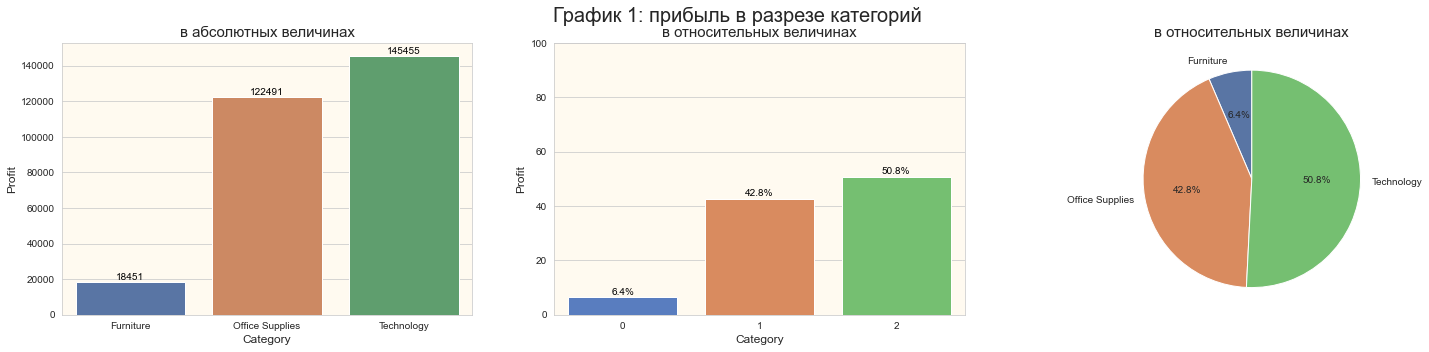

In [22]:
# Построим графики категорий совокупно за весь период.

fig, axes = plt.subplots(1, 3, figsize=(25, 5))
plt.suptitle('График 1: прибыль в разрезе категорий', fontsize=20)
sns.set_style('whitegrid', {'axes.facecolor': 'floralwhite', 'axes.grid': True})

# график в абсолютных величинах.
sns.barplot(ax=axes[0], x='Category', y='Profit', data = df, orient = 'v', ci = None, estimator = sum, palette ='deep')

for p in axes[0].patches:
    axes[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
    textcoords='offset points')

axes[0].set_title('в абсолютных величинах', fontsize=15)
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Profit', fontsize=12)
axes[0].tick_params(labelsize = 10)


# график в относительных величинах.
data_per = df.groupby('Category', as_index=False).agg(percentage =('Profit', lambda p: p.sum() / df['Profit'].sum() * 100)).round(2)
sns.barplot(ax=axes[1],x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v')

axes[1].set_title('в относительных величинах', fontsize=15)
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Profit', fontsize=12)
axes[1].tick_params(labelsize = 10)

for rect in axes[1].patches:
    axes[1].annotate("%.1f%%" % rect.get_height(), (rect.get_x() + rect.get_width() / 2, rect.get_height()), 
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
    textcoords='offset points')
axes[1].set(ylim=(0, 100))


# круговая диаграмма категорий в относительных величинах.
data_per_list = data_per['percentage'].to_list()
category = data_per['Category'].unique()
colors = ['#5975a4','#d98b5f','#75bf71']

axes[2].pie(x=data_per_list, labels=category, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
axes[2].set_title('в относительных величинах', fontsize=15)


plt.show()


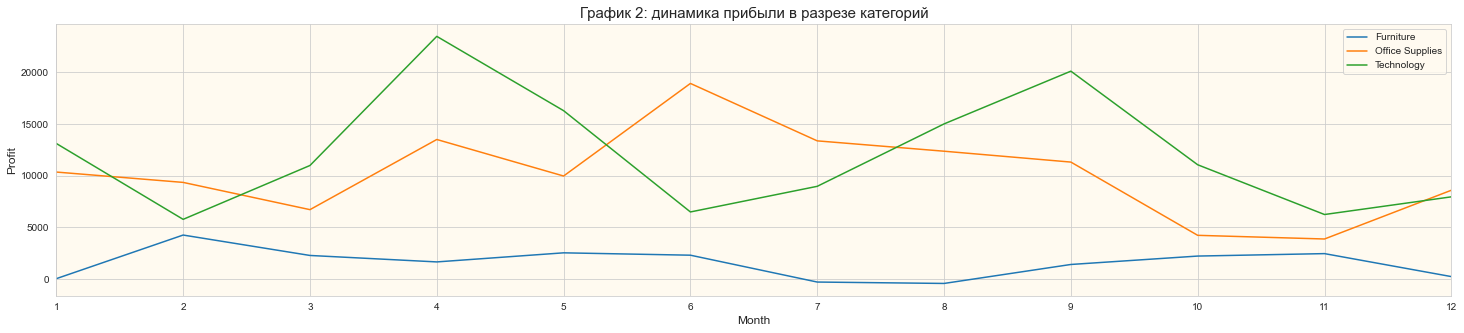

In [24]:
# Построим линейные графики категорий в разрезе месяцев.

# новый дата-фрейм только из нужных категорий + преобразование месяца в строку + агрегация данных
df_new = df[['Category', 'Profit','Month']]
df_new['Month'].apply(str)
df_new = df_new.groupby(['Category', 'Month'], as_index = False).sum().sort_values(['Category', 'Month'], ascending=[True, True], ignore_index=True)


fig, ax = plt.subplots(figsize=(25, 5))
sns.set_style('whitegrid', {'axes.facecolor': 'floralwhite', 'axes.grid': True})

categories = df_new['Category'].unique()
for i in categories:
    plt.plot(df_new[df_new['Category'] == i].groupby('Month').sum()['Profit'], label=i)
    
plt.xticks(np.arange(1, 13, 1))
ax.set_xlim(1, 12)

ax.set_title('График 2: динамика прибыли в разрезе категорий', fontsize=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.tick_params(labelsize = 10)
ax.legend()

plt.show()


## Вывод:  

Самая прибыльная категория - Technology, она генерирует больше всего прибыли.  
Однако, в динамике видна выраженная цикличность - в феврале, июне, июле, ноябре сильное падение.

# Task:  (продолжение к 4ому) Какой месяц для категории самый profitable, какая подкатегория вносила самый большой вклад в этом месяце? (в %). 



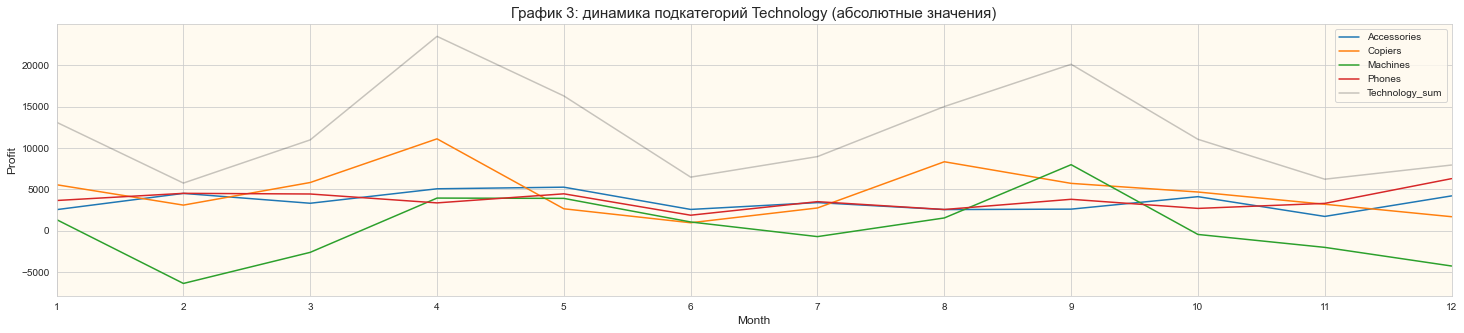

In [27]:
# Построим линейные графики подкатегорий Technology в разрезе месяцев.

# новый дата-фрейм только с Technology
df_Tech = df_Tech.loc[df_Tech['Category'] == 'Technology']


fig, ax = plt.subplots(figsize=(25, 5))
sns.set_style('whitegrid', {'axes.facecolor': 'floralwhite', 'axes.grid': True})

sub_categories = df_Tech['Sub-Category'].unique()
for i in sub_categories:
    plt.plot(df_Tech[df_Tech['Sub-Category'] == i].groupby('Month').sum()['Profit'], label=i)
plt.plot(df_Tech.groupby('Month').sum()['Profit'], label='Technology_sum', color = '#0a0b0c3a')
    
plt.xticks(np.arange(1, 13, 1))
ax.set_xlim(1, 12)

ax.set_title('График 3: динамика подкатегорий Technology (абсолютные значения)', fontsize=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.tick_params(labelsize = 10)
ax.legend()

plt.show()

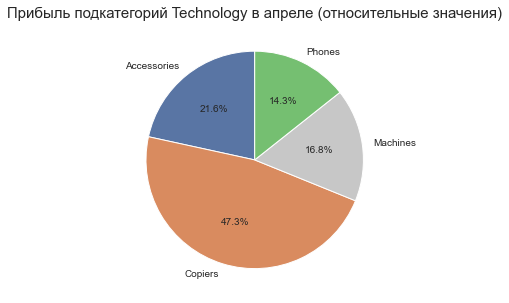

  Sub-Category  percentage
0  Accessories       21.58
1      Copiers       47.28
2     Machines       16.80
3       Phones       14.33


In [28]:
# Построим круговую диаграмму для апреля.

# новый дата-фрейм только для апреля
df_Tech_april = df_Tech.loc[df_Tech['Month'] == 4]
df_Tech_per = df_Tech_april.groupby('Sub-Category', as_index=False).agg(percentage =('Profit', lambda p: p.sum() / df_Tech_april['Profit'].sum() * 100)).round(2)


fig, ax = plt.subplots(figsize=(10, 5))

df_Tech_per_list = df_Tech_per['percentage'].to_list()
sub_categories = df_Tech_per['Sub-Category'].unique()
colors = ['#5975a4','#d98b5f','#0a0b0c3a','#75bf71']

ax.pie(x=df_Tech_per_list, labels=sub_categories, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)

ax.set_title('Прибыль подкатегорий Technology в апреле (относительные значения)', fontsize=15)


plt.show()
print(df_Tech_per)

## Вывод:
Самый прибыльный месяц - апрель.  
Наибольшее влияние внесла подкатегория Copiers.

# В какие месяцы топовая подкатегория не приносила больше всего profit?

In [32]:
df_Tech_sum = df_Tech.groupby(['Category','Sub-Category'], as_index = False).sum().sort_values('Profit', ascending=False)
df_Tech_sum


,Category,Sub-Category,Month,Profit
1,Technology,Copiers,78,55617.8249
3,Technology,Phones,78,44515.7306
0,Technology,Accessories,78,41936.6357
2,Technology,Machines,78,3384.7569


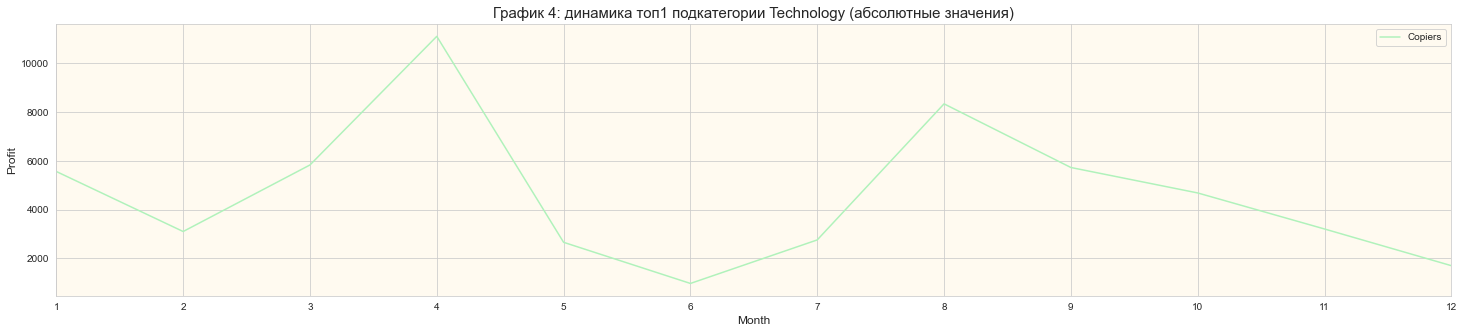

In [33]:
# Посмтрим на динамику Copiers.

fig, ax = plt.subplots(figsize=(25, 5))

sns.set_style('whitegrid', {'axes.facecolor': 'floralwhite', 'axes.grid': True})

plt.plot(df_Tech[df_Tech['Sub-Category'] == 'Copiers'].groupby('Month').sum()['Profit'], label='Copiers', color = '#b0f2bb')
    
plt.xticks(np.arange(1, 13, 1))
ax.set_xlim(1, 12)

ax.set_title('График 4: динамика топ1 подкатегории Technology (абсолютные значения)', fontsize=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.tick_params(labelsize = 10)
ax.legend()

plt.show()

## Вывод:

В июле у Copiers сильный спад.

# Task: Доверительные интервалы 
- <b> Файл: '../resources/doverit_inderval.txt' </b>
    - Постройте распределения двух величин;
    - Постройте 95% доверительный интервал медиан для двух выборок Ozon_Old // Ozon_New (можно методом bootstrap, количество раз = 1000).

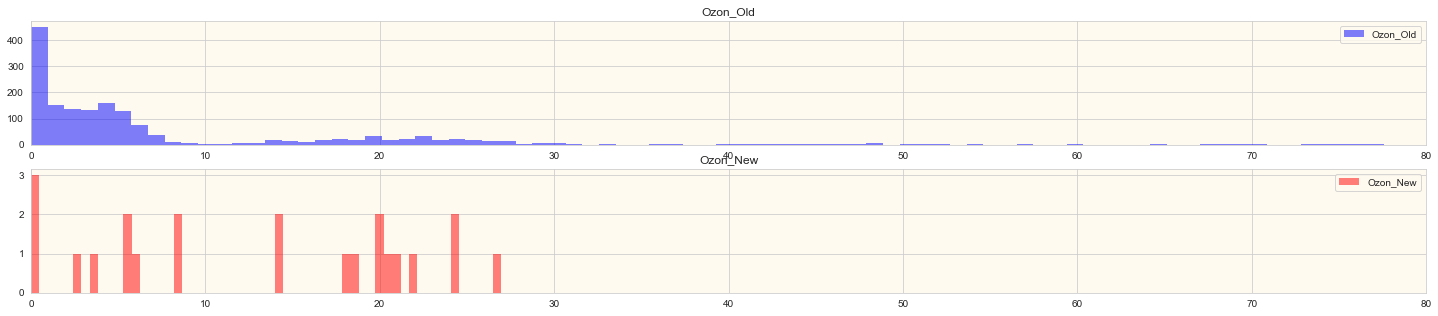

In [35]:
# Читаем данные:
df_inderval = pd.read_csv('../resources/doverit_inderval.txt', sep='	')


# Строим гистограммы:
df_inderval_Old = df_inderval[df_inderval['Group'] == 'Ozon_Old']
df_inderval_New = df_inderval[df_inderval['Group'] == 'Ozon_New']

fig, axex = plt.subplots(2,1, figsize=(25, 5))

sns.set_style('whitegrid', {'axes.facecolor': 'floralwhite', 'axes.grid': True})

axex[0].hist(df_inderval_Old['Time'], bins=200, edgecolor='None', alpha = 0.5, color= 'b', label = 'Ozon_Old')
axex[0].set_title('Ozon_Old')
axex[0].set_xlim(0, 80)
axex[0].legend()

axex[1].hist(df_inderval_New['Time'], bins=200, edgecolor='None', alpha = 0.5, color= 'r', label = 'Ozon_New')
axex[1].set_title('Ozon_New')
axex[1].set_xlim(0, 80)
axex[1].legend()
    
plt.show()


## Вывод:

Распределение Ozon_Old имеет более выраженую правосторонюю ассиметрию.
Ozon_New распределена более хаотично.

---

К сожалению, не смог доделать задание.

# Task: Проверьте гипотезу о том, что оценка сервиса Ozon_New выше, чем Ozon_Old c 5% уровнем значимости 

- <b> Файл: '../resources/satisfaction_test.txt' </b>

## Вывод

# Task: Last, but not least: Marketing SQL

В работе аналитика очень важно понимать откуда берутся данные, и по каким правилам они формируются. В популярной системе веб-аналитики Google Analytics есть определенные правила, на основе которых из пользовательских событий формируются пользовательские сессии. Напишите sql запрос, который будет делать из таблицы с событиями таблицу с сессиями. Началом новой сессии считать изменение источника трафика (хотя бы одного из параметров utm_source, utm_medium, utm_campaign) или наступление полуночи или бездействие в течение 4 часов (не было ниодного события). 
Задачу можно решить запросом на sql или используя python (на выбор кандидата)
Результирующая таблица должна иметь следующий вид:
    

![Example_picture](../img/result_example_.png)

anonymousId – уникальный id пользователя в системе
utm_source – источник трафика на сайт
utm_medium - канал трафика на сайт
utm_campaign – название рекламной кампании
session_start_time – начало сессии
duration, m – длительность сессии в минутах

Подключиться к БД
MySQL
Host: 94.139.253.221
Database: event_logs
User: candidate_db
Password: candidate123!
Table: hits

Или скачать CSV файл
https://drive.google.com/file/d/1sJwcJCSSBKQLMF85cxWhbDdtLVzsvCT_/view?usp=sharing


## Вывод